In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def solve_numerical_method(r, S0, K, T, sigma, beta, M, N, theta):
    Smin = 0.2 * S0
    Smax = 4 * S0

    dS = (Smax - Smin) / N
    dt = T / M

    S = np.linspace(Smin, Smax, N+1)

    A = np.zeros((N+1, N+1))
    A[0, 0] = 1
    for i in range(1, N):
        A[i, i-1] = (1 - theta) * (-(r * S[i]) / (2 * dS) + sigma ** 2 / (2 * dS ** 2) * (S[i] ** (2 * beta)))
        A[i, i] = -1 / dt + (1 - theta) * (-sigma ** 2 / (dS ** 2) * (S[i] ** (2 * beta)) - r)
        A[i, i+1] = (1 - theta) * ((r * S[i]) / (2 * dS) + sigma ** 2 / (2 * dS ** 2) * (S[i] ** (2 * beta)))
    A[-1, -1] = 1

    B = np.zeros((N+1, N+1))
    for i in range(1, N):
        B[i, i-1] = (-theta) * (-(r * S[i]) / (2 * dS) + sigma ** 2 / (2 * dS ** 2) * (S[i] ** (2 * beta)))
        B[i, i] = -1 / dt + (-theta) * (-sigma ** 2 / (dS ** 2) * (S[i] ** (2 * beta)) - r)
        B[i, i+1] = (-theta) * ((r * S[i]) / (2 * dS) + sigma ** 2 / (2 * dS ** 2) * (S[i] ** (2 * beta)))

    f = np.zeros(N+1)
    for i in range(N+1):
        f[i] = 1 if (S[i] > K) else 0

    rhs = np.zeros(N+1)
    bc = np.zeros(N+1)
    for j in range(M, 0, -1):
        bc[0] = 0
        bc[-1] = np.exp(-r * (T - (j - 1) * dt))
        rhs = np.matmul(B, f)
        rhs = np.add(rhs, bc)
        f = np.linalg.solve(A, rhs)

    return S, f

In [17]:
def convergence_test(r, S0, K, T, sigma, beta, M_list, N_list, theta):
    errors = np.zeros((len(M_list), len(N_list)))
    for i, M in enumerate(M_list):
        for j, N in enumerate(N_list):
            S_curr, f_curr = solve_numerical_method(r, S0, K, T, sigma, beta, M, N, theta)
            if i > 0 and j > 0:
                S_prev, f_prev = solve_numerical_method(r, S0, K, T, sigma, beta, M_list[i-1], N_list[j-1], theta)
                f_prev_interp = np.interp(S_curr, S_prev, f_prev)
                errors[i, j] = np.linalg.norm(f_curr - f_prev_interp, np.inf)
    return errors

In [18]:
r = 0.001
S0 = 1
K = 1
T = 1
sigma = 0.4
beta = 0.5
M_list = [16,32,64,128,256,512]
N_list = [16,32,64,128,256,512]
theta = 0.5

errors = convergence_test(r, S0, K, T, sigma, beta, M_list, N_list, theta)

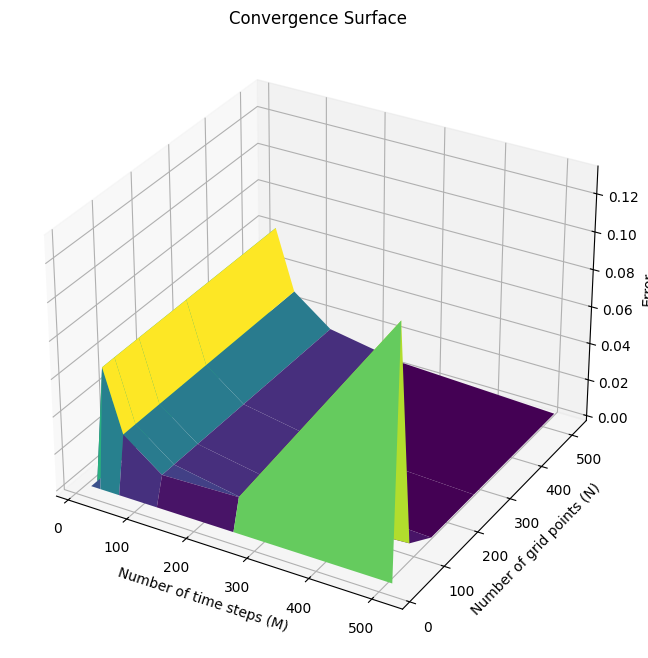

In [19]:
# Plot surface
M, N = np.meshgrid(M_list, N_list)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, N, errors, cmap='viridis')
ax.set_title('Convergence Surface')
ax.set_xlabel('Number of time steps (M)')
ax.set_ylabel('Number of grid points (N)')
ax.set_zlabel('Error')
plt.show()